# Baseline weather prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 12)

In [4]:
import warnings
warnings.simplefilter('ignore')

### Reading data

In [5]:
weather_df = pd.read_csv('NASA_weather_latitude_51.5_longitude_37.0.csv', skiprows=8)
weather_df["DATE"] = pd.to_datetime(weather_df["DAY"], format='%Y%m%d')

In [6]:
weather_df.head()

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH,DATE
0,19840101,2500.0,-5.20,0.26,0.479845,7.59,2.93,NaN,1984-01-01
1,19840102,3250.0,0.30,1.26,0.610800,7.50,2.77,NaN,1984-01-02
2,19840103,4240.0,-1.74,0.99,0.534874,7.11,0.72,NaN,1984-01-03
3,19840104,2740.0,-1.13,0.66,0.592380,5.12,0.44,NaN,1984-01-04
4,19840105,1890.0,-3.70,0.99,0.569003,3.09,0.88,NaN,1984-01-05


### Train - test split

In [7]:
train_tmp = weather_df[weather_df.DATE.dt.year > 1999].copy()
train_data = train_tmp[train_tmp.DATE.dt.year < 2015].copy()
train_data.set_index('DATE', inplace=True)
train_data = train_data.asfreq('d')

In [8]:
test_tmp = weather_df[weather_df.DATE.dt.year > 2014].copy()
test_data = test_tmp[test_tmp.DATE.dt.year < 2020].copy()
test_data.set_index('DATE', inplace=True)
test_data = test_data.asfreq('d')

In [9]:
display(train_data.head())
display(test_data.tail())

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
DATE,,,,,,,,
2000-01-01,20000101,3550.0,-12.80,-7.20,0.276993,1.56,1.21,NaN
2000-01-02,20000102,4140.0,-12.74,-6.73,0.297244,3.87,2.47,NaN
2000-01-03,20000103,4590.0,-16.81,-11.44,0.185930,1.34,0.40,NaN
2000-01-04,20000104,4600.0,-15.39,-8.39,0.220140,2.95,0.12,NaN
2000-01-05,20000105,3610.0,-11.50,-5.81,0.310407,3.70,0.65,NaN


,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
DATE,,,,,,,,
2019-12-27,20191227,1280.0,-1.88,0.75,0.547656,1.42,1.23,NaN
2019-12-28,20191228,990.0,-3.79,-1.13,0.423742,3.27,1.59,NaN
2019-12-29,20191229,1070.0,-6.74,-3.27,0.356630,2.94,1.63,NaN
2019-12-30,20191230,750.0,-6.81,-3.80,0.363870,3.76,0.47,NaN
2019-12-31,20191231,1200.0,-3.92,-0.81,0.474842,6.01,2.31,NaN


### Avarage

In [10]:
means = train_data.groupby(by=[train_data.index.month, train_data.index.day]).mean()

In [11]:
means = means[['IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN']]

In [12]:
IRRAD_year = means[means.index != (2, 29)].IRRAD.to_numpy()
IRRAD_leap_year = means.IRRAD.to_numpy()

TMIN_year = means[means.index != (2, 29)].TMIN.to_numpy()
TMIN_leap_year = means.TMIN.to_numpy()

TMAX_year = means[means.index != (2, 29)].TMAX.to_numpy()
TMAX_leap_year = means.TMAX.to_numpy()

VAP_year = means[means.index != (2, 29)].VAP.to_numpy()
VAP_leap_year = means.VAP.to_numpy()

WIND_year = means[means.index != (2, 29)].WIND.to_numpy()
WIND_leap_year = means.WIND.to_numpy()

RAIN_year = means[means.index != (2, 29)].RAIN.to_numpy()
RAIN_leap_year = means.RAIN.to_numpy()

In [13]:
# 2016 - leap
test_data_2015 = test_data[test_data.index.year == 2015]
test_data_2016 = test_data[test_data.index.year == 2016]
test_data_2017 = test_data[test_data.index.year == 2017]
test_data_2018 = test_data[test_data.index.year == 2018]
test_data_2019 = test_data[test_data.index.year == 2019]

In [14]:
test_data_2015['IRRAD_noise'] = test_data_2015.IRRAD - IRRAD_year
test_data_2016['IRRAD_noise'] = test_data_2016.IRRAD - IRRAD_leap_year
test_data_2017['IRRAD_noise'] = test_data_2017.IRRAD - IRRAD_year
test_data_2018['IRRAD_noise'] = test_data_2018.IRRAD - IRRAD_year
test_data_2019['IRRAD_noise'] = test_data_2019.IRRAD - IRRAD_year

test_data_2015['IRRAD_avg'] = IRRAD_year
test_data_2016['IRRAD_avg'] = IRRAD_leap_year
test_data_2017['IRRAD_avg'] = IRRAD_year
test_data_2018['IRRAD_avg'] = IRRAD_year
test_data_2019['IRRAD_avg'] = IRRAD_year

In [15]:
test_data_2015['TMIN_noise'] = test_data_2015.TMIN - TMIN_year
test_data_2016['TMIN_noise'] = test_data_2016.TMIN - TMIN_leap_year
test_data_2017['TMIN_noise'] = test_data_2017.TMIN - TMIN_year
test_data_2018['TMIN_noise'] = test_data_2018.TMIN - TMIN_year
test_data_2019['TMIN_noise'] = test_data_2019.TMIN - TMIN_year

test_data_2015['TMIN_avg'] = TMIN_year
test_data_2016['TMIN_avg'] = TMIN_leap_year
test_data_2017['TMIN_avg'] = TMIN_year
test_data_2018['TMIN_avg'] = TMIN_year
test_data_2019['TMIN_avg'] = TMIN_year

In [16]:
test_data_2015['TMAX_noise'] = test_data_2015.TMAX - TMAX_year
test_data_2016['TMAX_noise'] = test_data_2016.TMAX - TMAX_leap_year
test_data_2017['TMAX_noise'] = test_data_2017.TMAX - TMAX_year
test_data_2018['TMAX_noise'] = test_data_2018.TMAX - TMAX_year
test_data_2019['TMAX_noise'] = test_data_2019.TMAX - TMAX_year

test_data_2015['TMAX_avg'] = TMAX_year
test_data_2016['TMAX_avg'] = TMAX_leap_year
test_data_2017['TMAX_avg'] = TMAX_year
test_data_2018['TMAX_avg'] = TMAX_year
test_data_2019['TMAX_avg'] = TMAX_year

In [17]:
test_data_2015['VAP_noise'] = test_data_2015.VAP - VAP_year
test_data_2016['VAP_noise'] = test_data_2016.VAP - VAP_leap_year
test_data_2017['VAP_noise'] = test_data_2017.VAP - VAP_year
test_data_2018['VAP_noise'] = test_data_2018.VAP - VAP_year
test_data_2019['VAP_noise'] = test_data_2019.VAP - VAP_year

test_data_2015['VAP_avg'] = VAP_year
test_data_2016['VAP_avg'] = VAP_leap_year
test_data_2017['VAP_avg'] = VAP_year
test_data_2018['VAP_avg'] = VAP_year
test_data_2019['VAP_avg'] = VAP_year

In [18]:
test_data_2015['WIND_noise'] = test_data_2015.WIND - WIND_year
test_data_2016['WIND_noise'] = test_data_2016.WIND - WIND_leap_year
test_data_2017['WIND_noise'] = test_data_2017.WIND - WIND_year
test_data_2018['WIND_noise'] = test_data_2018.WIND - WIND_year
test_data_2019['WIND_noise'] = test_data_2019.WIND - WIND_year

test_data_2015['WIND_avg'] = WIND_year
test_data_2016['WIND_avg'] = WIND_leap_year
test_data_2017['WIND_avg'] = WIND_year
test_data_2018['WIND_avg'] = WIND_year
test_data_2019['WIND_avg'] = WIND_year

In [19]:
test_data_2015['RAIN_noise'] = test_data_2015.RAIN - RAIN_year
test_data_2016['RAIN_noise'] = test_data_2016.RAIN - RAIN_leap_year
test_data_2017['RAIN_noise'] = test_data_2017.RAIN - RAIN_year
test_data_2018['RAIN_noise'] = test_data_2018.RAIN - RAIN_year
test_data_2019['RAIN_noise'] = test_data_2019.RAIN - RAIN_year

test_data_2015['RAIN_avg'] = RAIN_year
test_data_2016['RAIN_avg'] = RAIN_leap_year
test_data_2017['RAIN_avg'] = RAIN_year
test_data_2018['RAIN_avg'] = RAIN_year
test_data_2019['RAIN_avg'] = RAIN_year

In [20]:
prediction_data = test_data_2015.append(test_data_2016)
prediction_data = prediction_data.append(test_data_2017)
prediction_data = prediction_data.append(test_data_2018)
prediction_data = prediction_data.append(test_data_2019)

### Plotting results

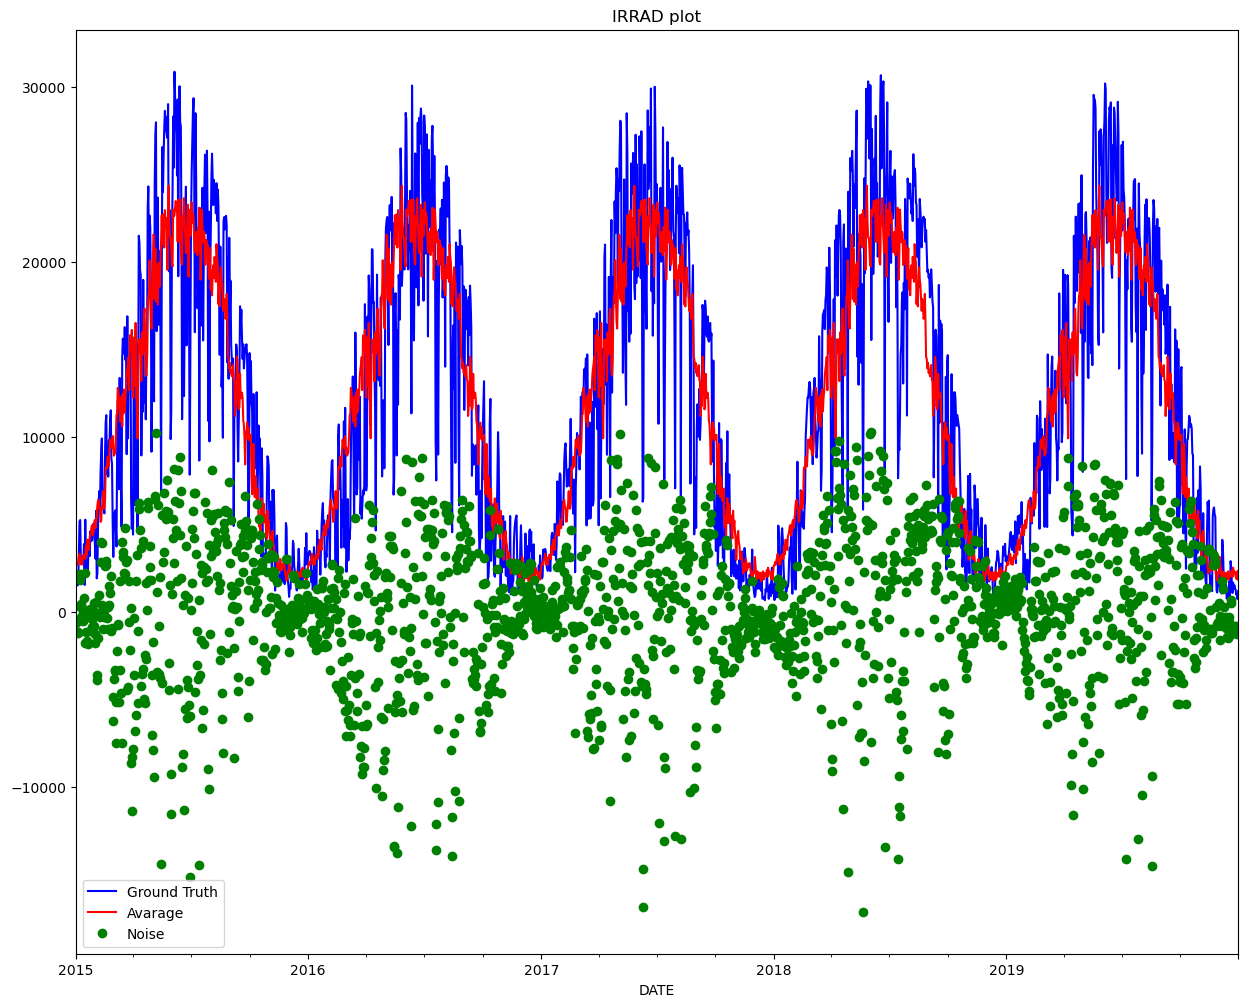

In [21]:
plt.title("IRRAD plot")
prediction_data.IRRAD.plot(style=['b']);
prediction_data.IRRAD_avg.plot(style=['r']);
prediction_data.IRRAD_noise.plot(style=['go']);
plt.legend(["Ground Truth", "Avarage", "Noise"]);

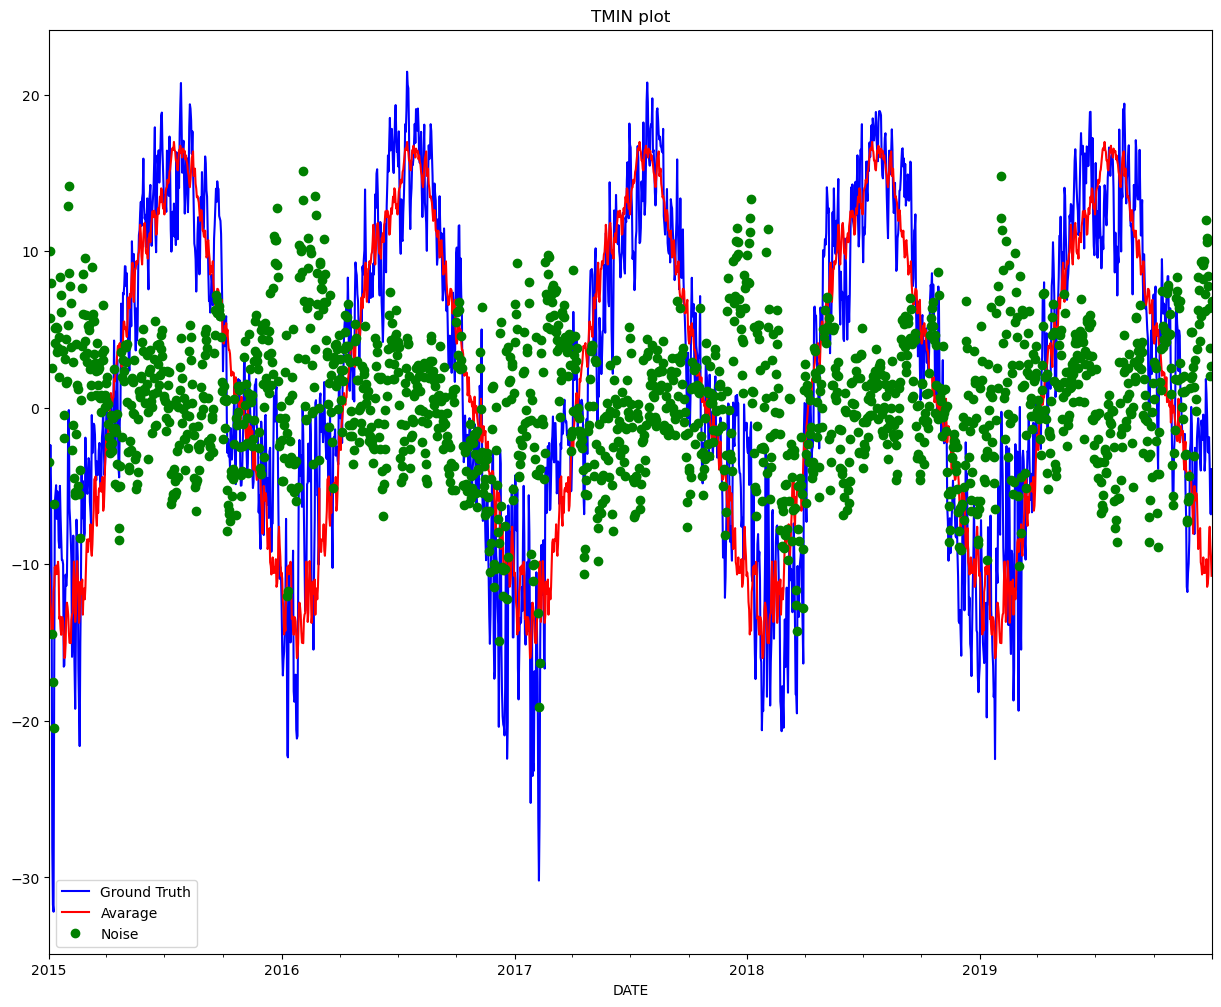

In [22]:
plt.title("TMIN plot")
prediction_data.TMIN.plot(style=['b']);
prediction_data.TMIN_avg.plot(style=['r']);
prediction_data.TMIN_noise.plot(style=['go']);
plt.legend(["Ground Truth", "Avarage", "Noise"]);

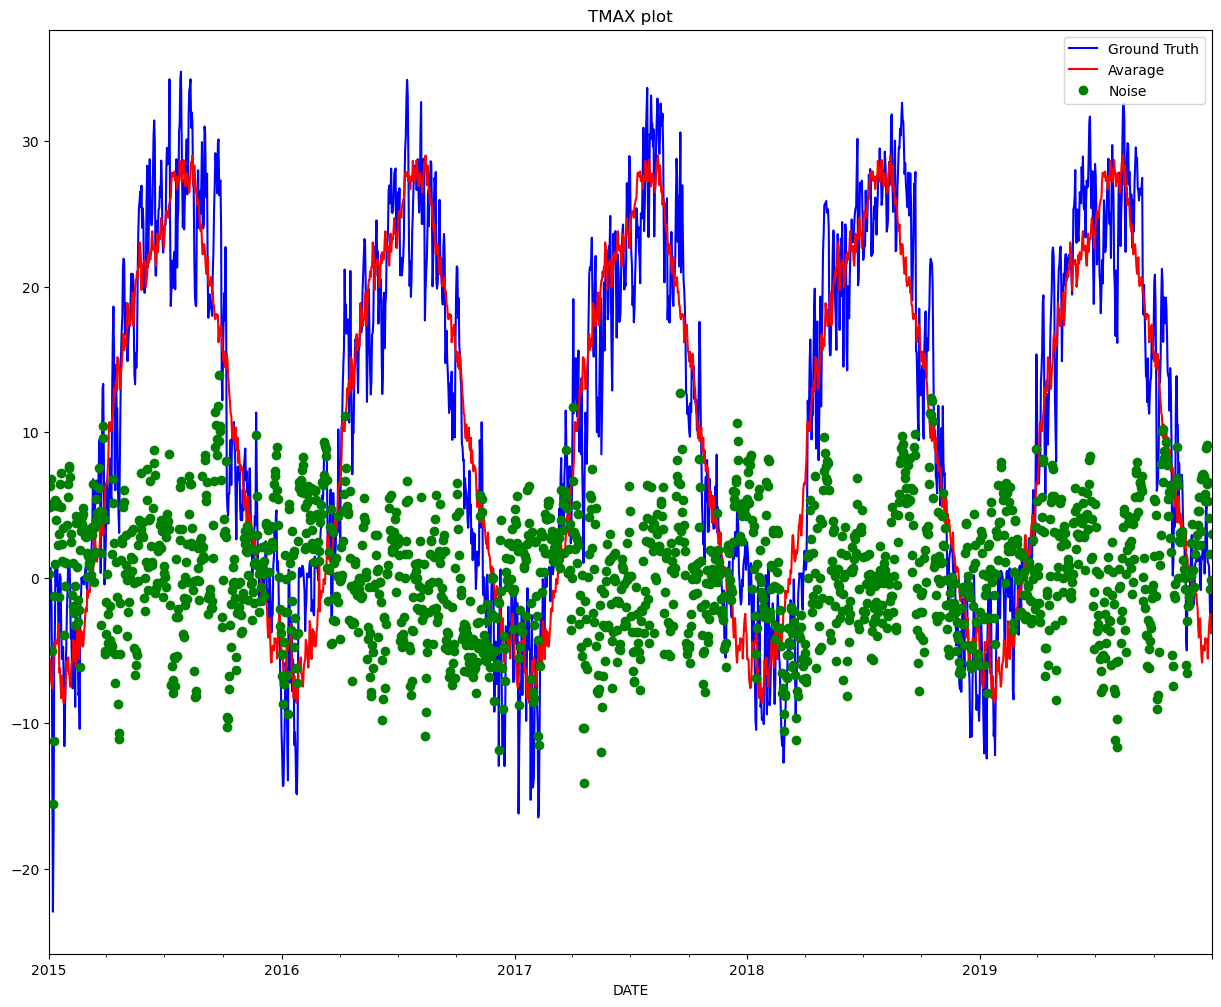

In [23]:
plt.title("TMAX plot")
prediction_data.TMAX.plot(style=['b']);
prediction_data.TMAX_avg.plot(style=['r']);
prediction_data.TMAX_noise.plot(style=['go']);
plt.legend(["Ground Truth", "Avarage", "Noise"]);

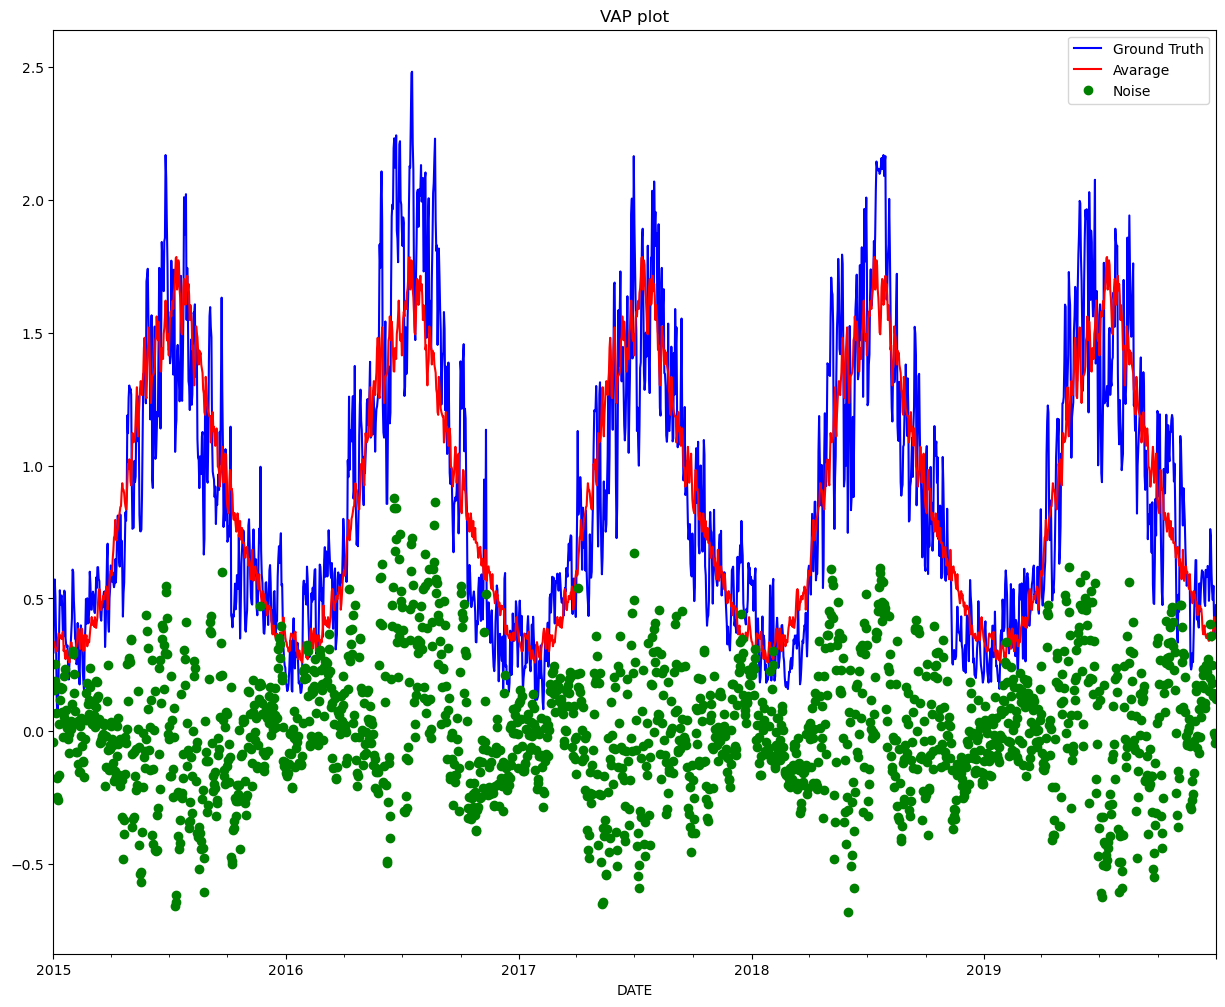

In [24]:
plt.title("VAP plot")
prediction_data.VAP.plot(style=['b']);
prediction_data.VAP_avg.plot(style=['r']);
prediction_data.VAP_noise.plot(style=['go']);
plt.legend(["Ground Truth", "Avarage", "Noise"]);

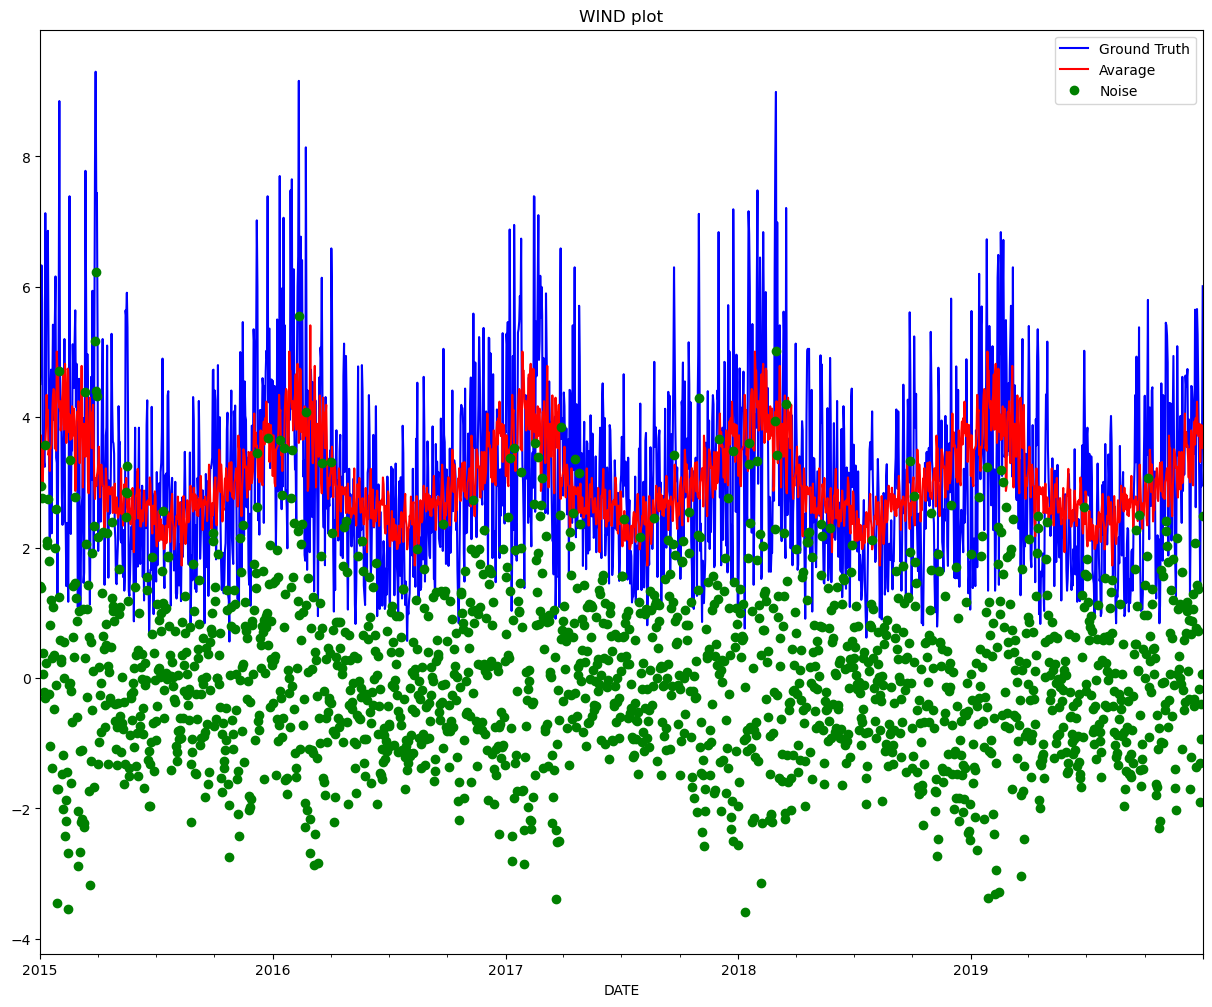

In [25]:
plt.title("WIND plot")
prediction_data.WIND.plot(style=['b']);
prediction_data.WIND_avg.plot(style=['r']);
prediction_data.WIND_noise.plot(style=['go']);
plt.legend(["Ground Truth", "Avarage", "Noise"]);

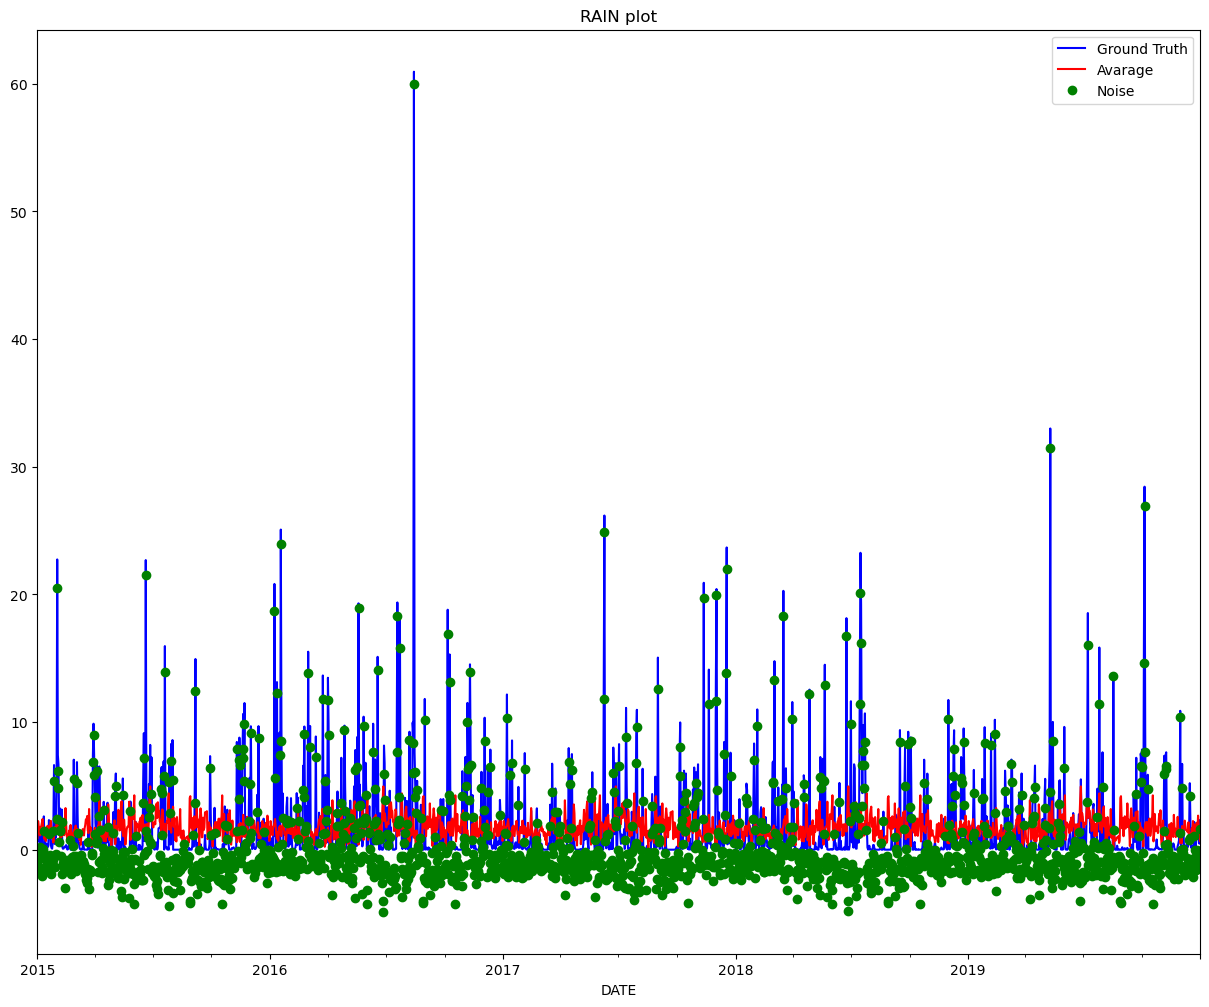

In [26]:
plt.title("RAIN plot")
prediction_data.RAIN.plot(style=['b']);
prediction_data.RAIN_avg.plot(style=['r']);
prediction_data.RAIN_noise.plot(style=['go']);
plt.legend(["Ground Truth", "Avarage", "Noise"]);

### Calculating metrics

$$
\text { Relative RMSE }=\frac{\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left({Y}_{i}-{V}_{i}\right)^{2}}}{\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left({Y}_{i}-\bar{Y}\right)^{2}}}
$$

In [27]:
def relative_rmse(target, preds):
    rmse = mean_squared_error(target, preds, squared=False)
    avg = np.full(len(preds), preds.mean())
    const_rmse = mean_squared_error(target, avg, squared=False)
    return rmse / const_rmse

In [28]:
rmse_irrad = mean_squared_error(prediction_data.IRRAD, prediction_data.IRRAD_avg, squared=False)
rmse_tmin = mean_squared_error(prediction_data.TMIN, prediction_data.TMIN_avg, squared=False)
rmse_tmax = mean_squared_error(prediction_data.TMAX, prediction_data.TMAX_avg, squared=False)
rmse_vap = mean_squared_error(prediction_data.VAP, prediction_data.VAP_avg, squared=False)
rmse_wind = mean_squared_error(prediction_data.WIND, prediction_data.WIND_avg, squared=False)
rmse_rain = mean_squared_error(prediction_data.RAIN, prediction_data.RAIN_avg, squared=False)

In [29]:
rrmse_irrad = relative_rmse(prediction_data.IRRAD, prediction_data.IRRAD_avg)
rrmse_tmin = relative_rmse(prediction_data.TMIN, prediction_data.TMIN_avg)
rrmse_tmax = relative_rmse(prediction_data.TMAX, prediction_data.TMAX_avg)
rrmse_vap = relative_rmse(prediction_data.VAP, prediction_data.VAP_avg)
rrmse_wind = relative_rmse(prediction_data.WIND, prediction_data.WIND_avg)
rrmse_rain = relative_rmse(prediction_data.RAIN, prediction_data.RAIN_avg)

In [30]:
print("RMSE IRRAD:\t%.4f" % rmse_irrad)
print("RMSE TMIN:\t%.4f" % rmse_tmin)
print("RMSE TMAX:\t%.4f" % rmse_tmax)
print("RMSE VAP:\t%.4f" % rmse_vap)
print("RMSE WIND:\t%.4f" % rmse_wind)
print("RMSE RAIN:\t%.4f" % rmse_rain)

RMSE IRRAD:	4132.4002
RMSE TMIN:	4.5382
RMSE TMAX:	4.4252
RMSE VAP:	0.2462
RMSE WIND:	1.3219
RMSE RAIN:	3.8191


In [31]:
print("Relative RMSE IRRAD:\t%.4f" % rrmse_irrad)
print("Relative RMSE TMIN:\t%.4f" % rrmse_tmin)
print("Relative RMSE TMAX:\t%.4f" % rrmse_tmax)
print("Relative RMSE VAP:\t%.4f" % rrmse_vap)
print("Relative RMSE WIND:\t%.4f" % rrmse_wind)
print("Relative RMSE RAIN:\t%.4f" % rrmse_rain)

Relative RMSE IRRAD:	0.4888
Relative RMSE TMIN:	0.4400
Relative RMSE TMAX:	0.3587
Relative RMSE VAP:	0.4705
Relative RMSE WIND:	0.9493
Relative RMSE RAIN:	1.0272


In [32]:
output = prediction_data[['DAY', 'IRRAD_avg', 'TMIN_avg', 'TMAX_avg', 'VAP_avg', 'WIND_avg', 'RAIN_avg', 'SNOWDEPTH']].copy()

In [33]:
output = output.rename(columns={
    'IRRAD_avg': 'IRRAD', 
    'TMIN_avg': 'TMIN', 
    'TMAX_avg': 'TMAX', 
    'VAP_avg': 'VAP', 
    'WIND_avg': 'WIND', 
    'RAIN_avg': 'RAIN' 
    })

In [34]:
output.to_csv('predicted_weather/baseline.csv', index=False)